## Метрика

In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование


## Загрузка необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка датасетов

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 87.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 72.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 32.5MB/s]


In [ ]:
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## Посмотрим на пропущенные значения

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

Ни в файле train, ни в файле test нет NaN значений. Однако в TotalSpent есть значения строки вида ' '. Заметим, что все они появляются лишь у людей с нулевым ClientPeriod, так что заменим все эти строки на 0.

In [ ]:
data[(data['TotalSpent']==' ')&(data['ClientPeriod']==0)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [ ]:
data[(data['TotalSpent']==' ')&(data['ClientPeriod']!=0)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


In [ ]:
def convert_to_number(x):
    if x!=' ':
        return float(x)
    else:
        return 0
data['TotalSpent'] = data['TotalSpent'].apply(convert_to_number)

In [ ]:
test['TotalSpent'] = test['TotalSpent'].apply(convert_to_number)

## Анализ данных

In [ ]:

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

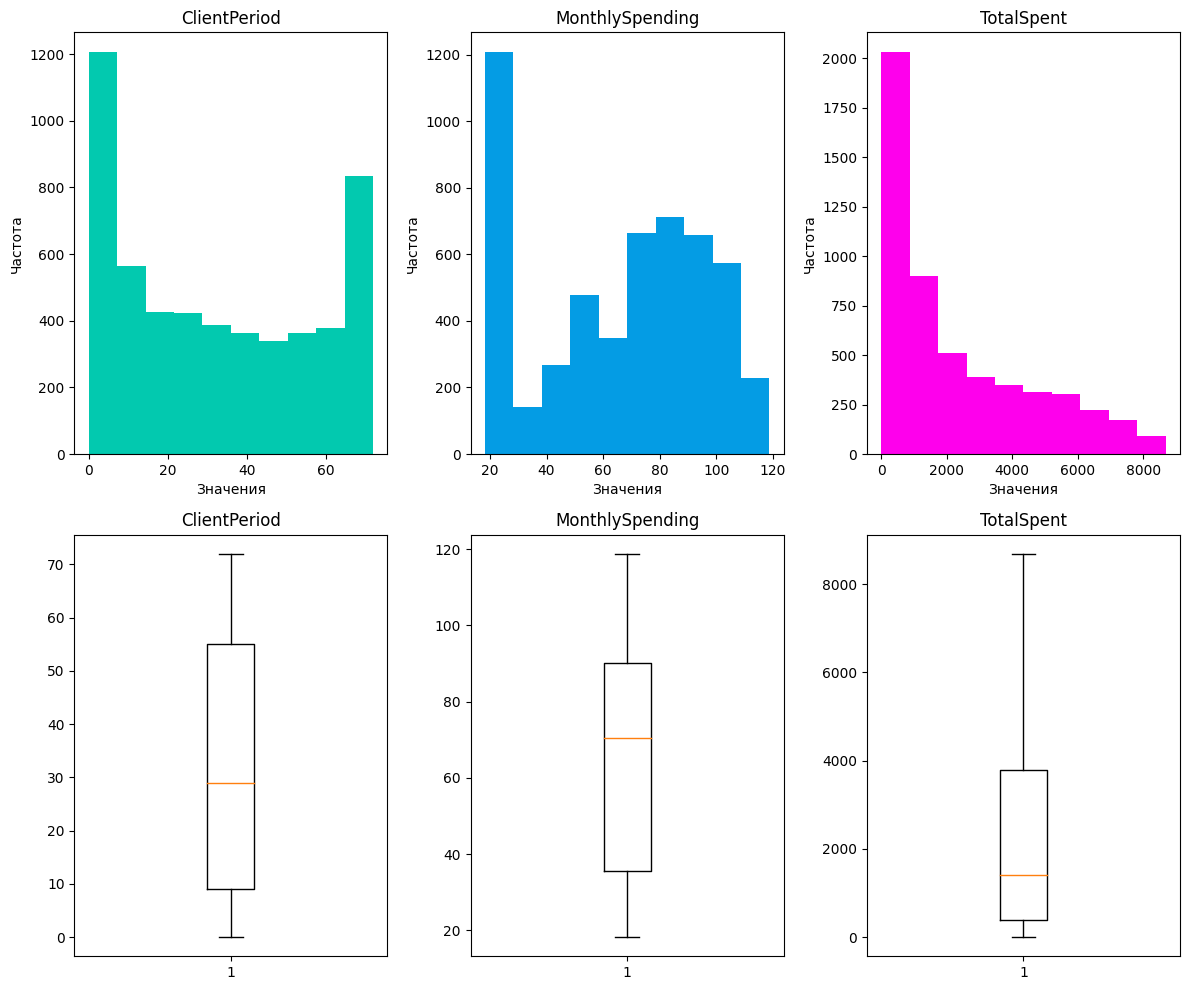

In [ ]:
#Графки для численных признаков

# Создаем фигуру с 2 строками и 2 столбцами
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

# Создаем гистограммы
axs[0, 0].hist(data['ClientPeriod'], color='#02C9AF')
axs[0, 0].set_title('ClientPeriod')
axs[0, 0].set_xlabel('Значения')
axs[0, 0].set_ylabel('Частота')

axs[0, 1].hist(data['MonthlySpending'], color='#049CE4')
axs[0, 1].set_title('MonthlySpending')
axs[0, 1].set_xlabel('Значения')
axs[0, 1].set_ylabel('Частота')

axs[0, 2].hist(data['TotalSpent'], color='#FE00EC')
axs[0, 2].set_title('TotalSpent')
axs[0, 2].set_xlabel('Значения')
axs[0, 2].set_ylabel('Частота')

#Рисуем ящики с усами
axs[1, 0].boxplot(data['ClientPeriod'])
axs[1, 0].set_title('ClientPeriod')

axs[1, 1].boxplot(data['MonthlySpending'])
axs[1, 1].set_title('MonthlySpending')

axs[1, 2].boxplot(data['TotalSpent'])
axs[1, 2].set_title('TotalSpent')

# Показать графики
plt.tight_layout()
plt.show()


**Ни** в одном из численных признаков нет существенных выбросов

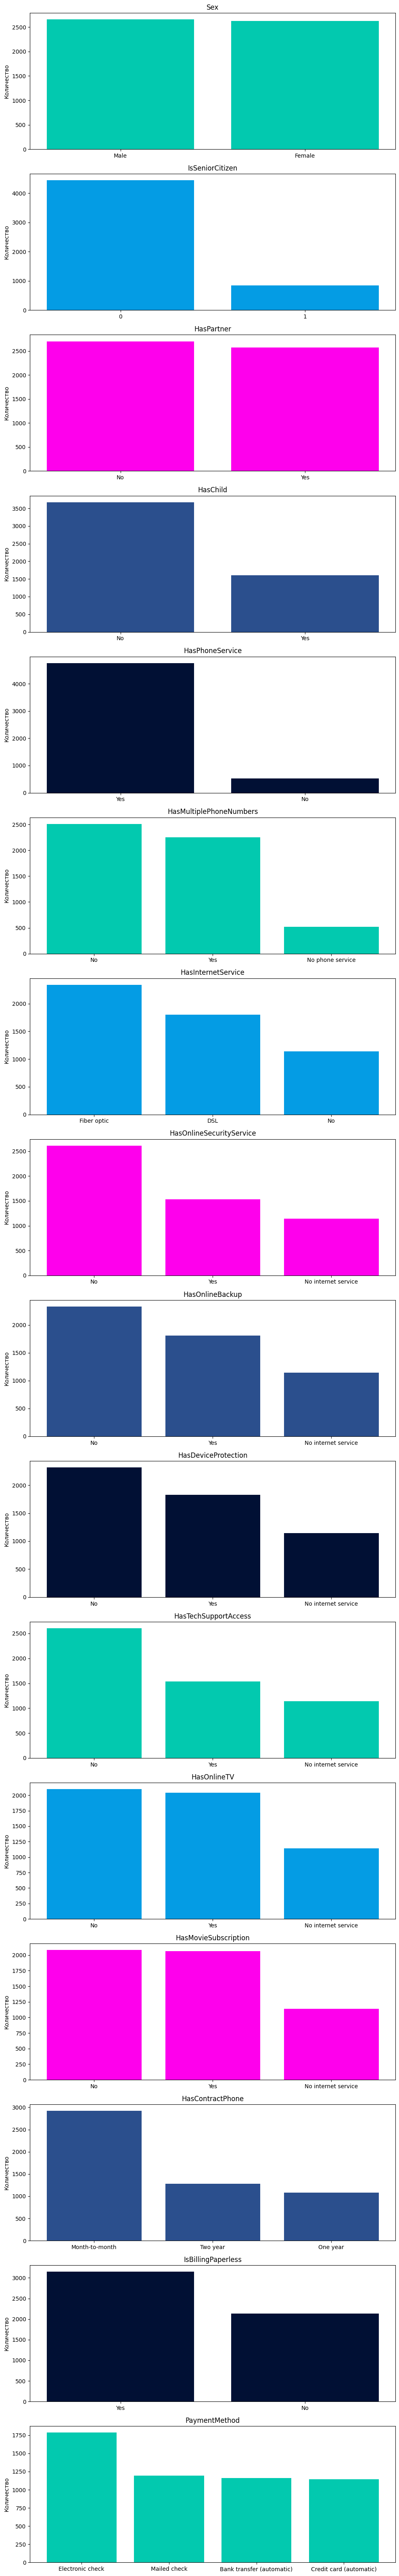

In [ ]:
fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, len(cat_cols) * 4))
colors = ['#02C9AF', '#049CE4', '#FE00EC', '#2B4F8D', '#011034']
for i, col in enumerate(cat_cols):
    # Получение значений и их количества
    counts = data[col].value_counts()

    # Построение столбчатой диаграммы
    axs[i].bar(counts.index, counts.values, color=colors[i%5])
    axs[i].set_title(col)
    axs[i].set_ylabel('Количество')
    axs[i].set_xticks(range(len(counts.index)))
    axs[i].set_xticklabels(counts.index)

plt.tight_layout()
plt.show()

<Axes: xlabel='Churn', ylabel='Count'>

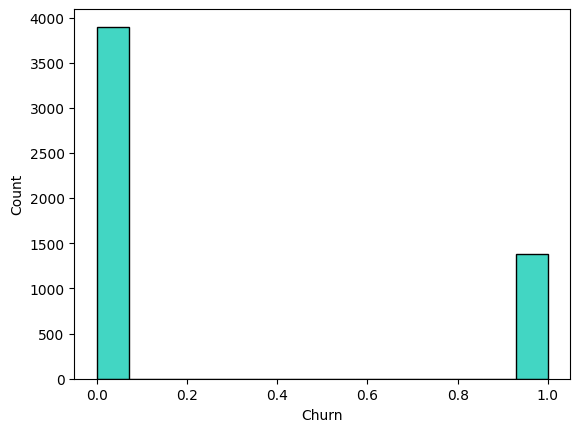

In [ ]:
sns.histplot(data=data, x="Churn", color='#02C9AF')


In [ ]:
rat = len(data.loc[data['Churn']==0])//len(data.loc[data['Churn']==1])
rat


2



```
# Выбран кодовый формат
```

Из графика видно, что класс 1 больше класса 0 в 2 раза

# Часть 2. Применение линейных моделей.

## Импорт необходимых библиотек

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

## Предобработка данных



In [ ]:
coder = LabelEncoder()

cat_cols_2 = [
    'Sex',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasContractPhone',
    'PaymentMethod'
]
data_proc = data
test_proc = test

for name in cat_cols_2:
    coder.fit(data_proc[name])
    data_proc[name]=coder.transform(data_proc[name])

def convert_to_bool(x):
    if 'No' in x:
        return 0
    elif 'Yes' in x:
        return 1

cat_cols_1 = [
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'IsBillingPaperless',
]

for name in cat_cols_1:
  data_proc[name] = data_proc[name].apply(convert_to_bool)

In [ ]:
for name in cat_cols_1:
  test_proc[name] = test_proc[name].apply(convert_to_bool)

for name in cat_cols_2:
    coder.fit(test_proc[name])
    test_proc[name]=coder.transform(test_proc[name])

Для нормализации данных используем Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Создание объекта MinMaxScaler
scaler = MinMaxScaler()

# Применение Min-Max Scaling только к числовым признакам
data_proc[num_cols] = scaler.fit_transform(data_proc[num_cols])


In [ ]:
test_proc[num_cols] = scaler.fit_transform(test_proc[num_cols])

In [ ]:
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   float64
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   int64  
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   int64  
 6   HasChild                  5282 non-null   int64  
 7   HasPhoneService           5282 non-null   int64  
 8   HasMultiplePhoneNumbers   5282 non-null   int64  
 9   HasInternetService        5282 non-null   int64  
 10  HasOnlineSecurityService  5282 non-null   int64  
 11  HasOnlineBackup           5282 non-null   int64  
 12  HasDeviceProtection       5282 non-null   int64  
 13  HasTechSupportAccess      5282 non-null   int64  
 14  HasOnlin

In [ ]:
test_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   float64
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   int64  
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   int64  
 6   HasChild                  1761 non-null   int64  
 7   HasPhoneService           1761 non-null   int64  
 8   HasMultiplePhoneNumbers   1761 non-null   int64  
 9   HasInternetService        1761 non-null   int64  
 10  HasOnlineSecurityService  1761 non-null   int64  
 11  HasOnlineBackup           1761 non-null   int64  
 12  HasDeviceProtection       1761 non-null   int64  
 13  HasTechSupportAccess      1761 non-null   int64  
 14  HasOnlin

## Корреляционаая матрица

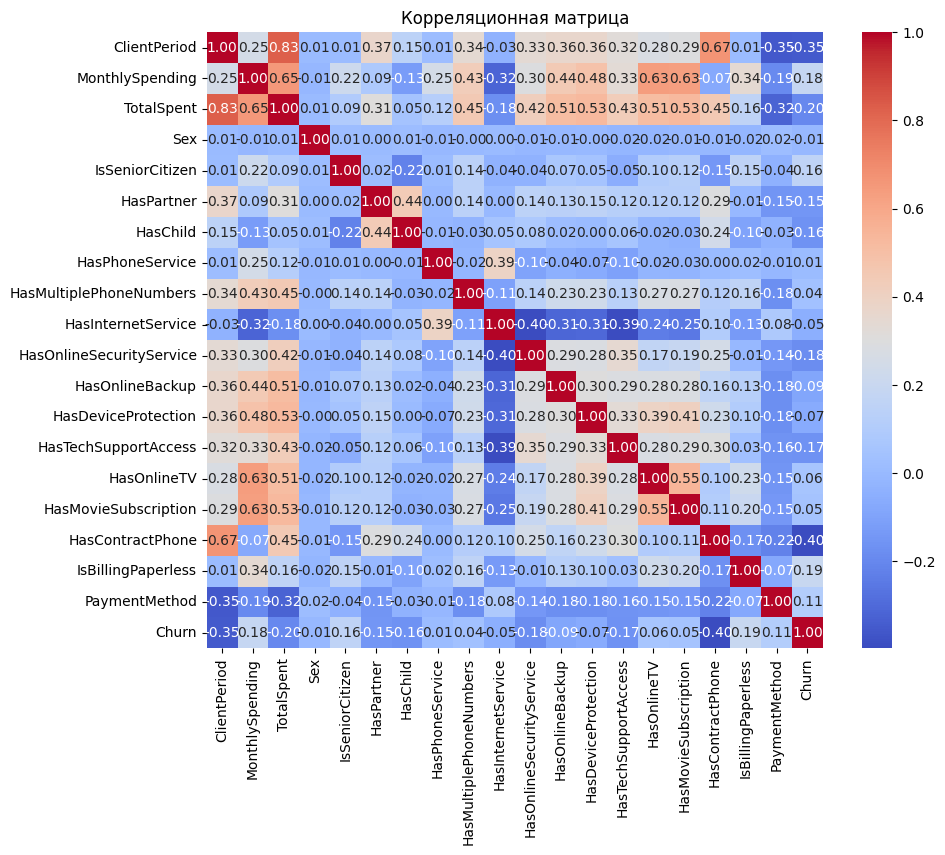

In [ ]:
correlation_matrix = data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
data.corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
IsBillingPaperless,0.194040
MonthlySpending,0.184769
IsSeniorCitizen,0.156872
PaymentMethod,0.108666
HasOnlineTV,0.059193
HasMovieSubscription,0.050521
HasMultiplePhoneNumbers,0.037866
HasPhoneService,0.010849
Sex,-0.008325


## Разделение на тестовую и валидационную выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['IsBillingPaperless', 'MonthlySpending', 'IsSeniorCitizen', 'PaymentMethod', 'HasContractPhone', 'ClientPeriod', 'TotalSpent', 'HasOnlineSecurityService', 'HasTechSupportAccess', 'HasChild', 'HasPartner']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data_proc['Churn'])

In [ ]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [2905 1056]
Количество строк в y_test по классам: [993 328]


## Обучение модели

In [ ]:
model = LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], scoring='roc_auc', refit=True, class_weight='balanced')

model.fit(X_train, y_train)

LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], class_weight='balanced',
                     scoring='roc_auc')

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
roc_auc_score(y_test, y_pred)

0.7862629872522291

## Применение градиентного бустинга

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(data['Churn']), y=data['Churn'])
class_weights

array([0.67752694, 1.90823699])

In [ ]:
X = data[['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data['Churn'])

In [ ]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [2933 1028]
Количество строк в y_test по классам: [965 356]


In [ ]:
model = CatBoostClassifier(learning_rate=0.1, iterations=50, depth=6, class_weights=class_weights, cat_features=cat_cols)
model.fit(X_train, y_train)
model_score = model.score(X_train, y_train)

0:	learn: 0.6657295	total: 4ms	remaining: 196ms
1:	learn: 0.6428785	total: 8.57ms	remaining: 206ms
2:	learn: 0.6243925	total: 12.1ms	remaining: 189ms
3:	learn: 0.6093097	total: 17.2ms	remaining: 198ms
4:	learn: 0.5948803	total: 22.3ms	remaining: 200ms
5:	learn: 0.5814070	total: 27.5ms	remaining: 202ms
6:	learn: 0.5703431	total: 31.6ms	remaining: 194ms
7:	learn: 0.5616882	total: 35.1ms	remaining: 184ms
8:	learn: 0.5539389	total: 38.7ms	remaining: 176ms
9:	learn: 0.5457496	total: 42.1ms	remaining: 169ms
10:	learn: 0.5391320	total: 45.6ms	remaining: 162ms
11:	learn: 0.5320657	total: 49.4ms	remaining: 156ms
12:	learn: 0.5264955	total: 53.3ms	remaining: 152ms
13:	learn: 0.5215626	total: 57.1ms	remaining: 147ms
14:	learn: 0.5178179	total: 60.6ms	remaining: 141ms
15:	learn: 0.5140405	total: 64.1ms	remaining: 136ms
16:	learn: 0.5104049	total: 67.7ms	remaining: 131ms
17:	learn: 0.5069694	total: 71.1ms	remaining: 126ms
18:	learn: 0.5045992	total: 73.2ms	remaining: 119ms
19:	learn: 0.5009026	tota

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
roc_auc_score(y_test, y_pred)

0.7651976480176981

## Выбор лучшей модели

In [ ]:
X_train = data[['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']]
X_test = test[['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']]
y_train = data['Churn']

In [ ]:
best_model = CatBoostClassifier(learning_rate=0.1, iterations=50, depth=6, class_weights=class_weights, cat_features=cat_cols)

In [ ]:
best_model.fit(X_train, y_train)

0:	learn: 0.6638128	total: 14ms	remaining: 687ms
1:	learn: 0.6423299	total: 21.9ms	remaining: 525ms
2:	learn: 0.6231908	total: 33.3ms	remaining: 522ms
3:	learn: 0.6063166	total: 42.9ms	remaining: 493ms
4:	learn: 0.5925834	total: 52.2ms	remaining: 470ms
5:	learn: 0.5807763	total: 63.4ms	remaining: 465ms
6:	learn: 0.5696252	total: 74ms	remaining: 454ms
7:	learn: 0.5596409	total: 85.5ms	remaining: 449ms
8:	learn: 0.5525580	total: 92.1ms	remaining: 420ms
9:	learn: 0.5449663	total: 103ms	remaining: 411ms
10:	learn: 0.5382843	total: 114ms	remaining: 404ms
11:	learn: 0.5316266	total: 127ms	remaining: 401ms
12:	learn: 0.5252910	total: 136ms	remaining: 388ms
13:	learn: 0.5203917	total: 146ms	remaining: 375ms
14:	learn: 0.5149903	total: 158ms	remaining: 370ms
15:	learn: 0.5106761	total: 170ms	remaining: 362ms
16:	learn: 0.5077461	total: 177ms	remaining: 344ms
17:	learn: 0.5044462	total: 187ms	remaining: 333ms
18:	learn: 0.5015118	total: 197ms	remaining: 322ms
19:	learn: 0.4981982	total: 209ms	re

In [ ]:
test['Churn'] = best_model.predict(X_test)

In [ ]:
#X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', index_col='Id')

submission['Churn'] = test['Churn']
 # используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.head()

submission.to_csv('best.csv', )